In [ ]:
import sys

print("--sys.version—")
print(sys.version)

--sys.version—
3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [ ]:
#모델 설정(설치 및 로딩)
from keras.models import load_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# 모델 불러오기
model = load_model('facenet_keras.h5')
# 입력과 출력 배열 형태 요약
print(model.inputs) #160x160 형태의 입력 컬러 이미지
print(model.outputs) #128개의 요소 벡터로 포함 된 얼굴을 출력함

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [ ]:
# 얼굴 감지
# --> 얼굴 감지(예: 사진에서 얼굴을 찾고 추출하기)를 위해 멀티태스킹 합성곱 신경망(MTCNN)을 사용
!pip install MTCNN
# MTCNN이 올바르게 설치되었는지 확인
import mtcnn
# 버전 출력
print(mtcnn.__version__)

     |████████████████████████████████| 2.3 MB 6.7 MB/s 
0.1.0


In [ ]:
!pip install pillow #PIL라이브러리 설치

In [ ]:
from PIL import Image
#open() 함수를 사용하여 이미지를 넘파이 배열로 로드하는 것
# 파일로 이미지 불러오기
image = Image.open('face1.jpg')
# RGB로 변환, 필요시
image = image.convert('RGB')
# 배열로 변환
pixels = np.asarray(image)


In [ ]:
#MTCNN 얼굴감지기 클래스 만들기
# 감지기 생성, 기본 가중치 이용
detector = mtcnn.MTCNN()
# 이미지에서 얼굴 감지
results = detector.detect_faces(pixels)

In [ ]:
#사진에 얼굴이 하나만 있다고 가정 --->  경계 상자의 픽셀 좌표를 결정
# 첫번째 얼굴에서 경계 상자 추출
x1, y1, width, height = results[0]['box']
# 음수 값이 나올때도 있음 --> 절대값 활용하여 수정
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
# 좌표값 활용하여 얼굴 추출
face = pixels[y1:y2, x1:x2]
# 얼굴 이미지의 크기를 원하는 크기로 조정 모델 사이즈로 픽셀 재조정
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = np.asarray(image)

In [ ]:
# 지금까지 과정 하나로 묶어서 함수 만들기
# 주어진 사진에서 하나의 얼굴 추출하는 함수
def extract_face(filename, required_size=(160, 160)):
	# 파일에서 이미지 불러오기
	image = Image.open(filename)
	# RGB로 변환, 필요시
	image = image.convert('RGB')
	# 배열로 변환
	pixels = np.asarray(image)
	# 감지기 생성, 기본 가중치 이용
	detector = mtcnn.MTCNN()
	# 이미지에서 얼굴 감지
	results = detector.detect_faces(pixels)
	# 첫 번째 얼굴에서 경계 상자 추출 ----> ★★★여러개 추출할 수 있도록 변동 필요함!!!!!!!★★★
	x1, y1, width, height = results[0]['box']
	# 버그 수정
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# 얼굴 추출
	face = pixels[y1:y2, x1:x2]
	# 모델 사이즈로 픽셀 재조정
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = np.asarray(image)
	return face_array


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


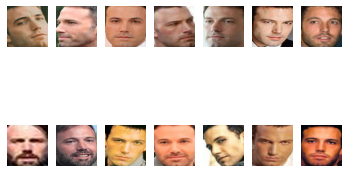

In [ ]:
from os import listdir #폴더 읽어오기
folder = 'train/ben_afflek/'
i = 1
#파일 열기
for filename in listdir(folder):
  #경로추가
  path = folder + filename
  #얼굴추출
  face = extract_face(path)
  print(i,face.shape)
  #플롯
  plt.subplot(2,7,i)
  plt.axis('off')
  plt.imshow(face)
  i+=1
plt.show()



In [ ]:
#디렉토리 안의 모든 이미지를 불러오고 이미지에서 얼굴 추출
def load_faces(directory):
	faces = list()
	# 파일 열거
	for filename in listdir(directory):
		# 경로
		path = directory + filename
		# 얼굴 추출
		face = extract_face(path)
		# 저장
		faces.append(face)
	return faces

# **dataset 불러오는 함수(통합ver)**


In [ ]:
import os

# 지금까지 과정 하나로 묶어서 함수 만들기
# 주어진 사진에서 하나의 얼굴 추출하는 함수
def extract_face(filename, required_size=(160, 160)):
	# 파일에서 이미지 불러오기
	image = Image.open(filename)
	# RGB로 변환, 필요시
	image = image.convert('RGB')
	# 배열로 변환
	pixels = np.asarray(image)
	# 감지기 생성, 기본 가중치 이용
	detector = mtcnn.MTCNN()
	# 이미지에서 얼굴 감지
	results = detector.detect_faces(pixels)
	# 첫 번째 얼굴에서 경계 상자 추출 ----> ★★★여러개 추출할 수 있도록 변동 필요함!!!!!!!★★★
	x1, y1, width, height = results[0]['box']
	# 버그 수정
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# 얼굴 추출
	face = pixels[y1:y2, x1:x2]
	# 모델 사이즈로 픽셀 재조정
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = np.asarray(image)
	return face_array


#디렉토리 안의 모든 이미지를 불러오고 이미지에서 얼굴 추출
def load_faces(directory):
	faces = list()
	# 파일 열거
	for filename in listdir(directory):
		# 경로
		path = directory + filename
		# 얼굴 추출
		face = extract_face(path)
		# 저장
		faces.append(face)
	return faces

  
# 이미지를 포함하는 각 클래스에 대해 하나의 하위 디렉토리가 포함된 데이터셋을 불러오기
def load_dataset(directory):
	X, y = list(), list()
	# 클래스별로 폴더 열거
	for subdir in listdir(directory):
		# 경로
		path = directory + subdir + '/'
		# 디렉토리에 있을 수 있는 파일을 건너뛰기(디렉토리가 아닌 파일)
		if not os.path.isdir(path):
			continue
		# 하위 디렉토리의 모든 얼굴 불러오기
		faces = load_faces(path)
		# 레이블 생성
		labels = [subdir for _ in range(len(faces))]
		# 진행 상황 요약
		print('>%d개의 예제를 불러왔습니다. 클래스명: %s' % (len(faces), subdir))
		# 저장
		X.extend(faces)
		y.extend(labels)
	return np.asarray(X), np.asarray(y)

In [ ]:
trainX, trainy = load_dataset('train/')
print(trainX.shape, trainy.shape)

>14개의 예제를 불러왔습니다. 클래스명: ben_afflek
>0개의 예제를 불러왔습니다. 클래스명: .ipynb_checkpoints
>21개의 예제를 불러왔습니다. 클래스명: jerry_seinfeld
>19개의 예제를 불러왔습니다. 클래스명: madonna
>17개의 예제를 불러왔습니다. 클래스명: elton_john
>22개의 예제를 불러왔습니다. 클래스명: mindy_kaling
(93, 160, 160, 3) (93,)


In [ ]:
# 테스트 데이터셋 불러오기
testX, testy = load_dataset('val/')
print(testX.shape, testy.shape)
# 배열을 단일 압축 포맷 파일로 저장
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>5개의 예제를 불러왔습니다. 클래스명: ben_afflek
>0개의 예제를 불러왔습니다. 클래스명: .ipynb_checkpoints
>5개의 예제를 불러왔습니다. 클래스명: jerry_seinfeld
>5개의 예제를 불러왔습니다. 클래스명: madonna
>5개의 예제를 불러왔습니다. 클래스명: elton_john
>5개의 예제를 불러왔습니다. 클래스명: mindy_kaling
(25, 160, 160, 3) (25,)


In [ ]:
# 얼굴 데이터셋 불러오기
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('불러오기: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

불러오기:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


In [ ]:
# facenet 모델 불러오기
model = load_model('facenet_keras.h5')
print('모델 불러오기')

모델 불러오기


# **Facenet 이용해 데이터셋 내 각 얼굴에 대한 얼굴 임베딩 계산**

In [ ]:
# 하나의 얼굴의 얼굴 임베딩 얻기
def get_embedding(model, face_pixels):
	# 픽셀 값의 척도
	face_pixels = face_pixels.astype('int32')
	# 채널 간 픽셀값 표준화(전역에 걸쳐)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# 얼굴을 하나의 샘플로 변환
	samples = np.expand_dims(face_pixels, axis=0)
	# 임베딩을 갖기 위한 예측 생성
	yhat = model.predict(samples)
	return yhat[0]

# 얼굴 데이터셋 불러오기
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('불러오기: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# facenet 모델 불러오기
model = load_model('facenet_keras.h5')
print('모델 불러오기')
# 훈련 셋에서 각 얼굴을 임베딩으로 변환하기
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)
# 테스트 셋에서 각 얼굴을 임베딩으로 변환하기
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)
# 배열을 하나의 압축 포맷 파일로 저장
np.savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

불러오기:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
모델 불러오기
(93, 128)
(25, 128)


## **얼굴 분류하기**

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
# 데이터셋 불러오기
data = np.load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('데이터셋: 훈련=%d, 테스트=%d' % (trainX.shape[0], testX.shape[0]))
# 데이터 모델링하기전 얼굴 임베딩 vector normalizer 진행하기(vector의 길이가 1이나 단위길이가 될때 값을 스케일링하기)
# sklearn의 Normalizer 클래스 사용하기
# 입력vector 일반화
# 입력 벡터 일반화
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# 목표 레이블 암호화(이름 변수 문자열 정수로 변환하기)
out_encoder = preprocessing.LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

데이터셋: 훈련=93, 테스트=25


In [ ]:
#모델 적합화 시키기(SVM활용하기) --> sklearn SVC클래스
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear')
model.fit(trainX, trainy)

#모델 평가하기(분류 정확도 계산하기)
# 예측
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# 정확도 점수
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# 요약
print('정확도: 훈련=%.3f, 테스트=%.3f' % (score_train*100, score_test*100))

정확도: 훈련=100.000, 테스트=100.000


In [ ]:
data['arr_2']

array([[ 0.18325394,  0.697386  , -0.88391024, ..., -0.26654106,
        -0.32485288,  1.2132577 ],
       [ 0.08614097,  1.3954458 , -2.2830677 , ..., -0.2650624 ,
        -1.6883076 ,  1.0566344 ],
       [-0.35715917,  0.5680584 , -0.02246183, ...,  0.3680794 ,
        -1.2914203 ,  0.9782194 ],
       ...,
       [ 0.623639  ,  0.12740731,  0.5318556 , ...,  0.8790719 ,
         0.6754727 , -1.5649489 ],
       [ 0.5581636 , -1.0386926 ,  0.28776994, ...,  0.5701826 ,
        -0.89292675, -0.410564  ],
       [ 0.16292956, -0.08890814, -0.4240992 , ...,  1.9795903 ,
         1.0397245 , -1.5657152 ]], dtype=float32)

예상: elton_john (92.291)
추측: elton_john


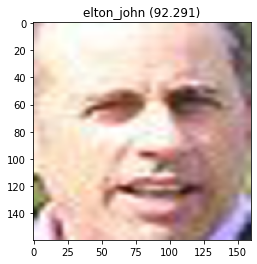

In [ ]:
from random import choice
# 얼굴 불러오기
data = np.load('5-celebrity-faces-dataset.npz')
testX_faces = data['arr_0']

# 얼굴 임베딩 불러오기
data = np.load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# 입력 벡터 일반화
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# 목표 레이블 암호화
out_encoder = preprocessing.LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# 모델 적합
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# 테스트 데이터셋에서 임의의 예제에 대한 테스트 모델
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# 얼굴 예측
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# 이름 얻기
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('예상: %s (%.3f)' % (predict_names[0], class_probability))
print('추측: %s' % random_face_name[0])

# 재미삼아 그리기
plt.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()